# 爱因斯坦求和约定与颜色变换

所谓Einstein约定求和就是略去求和式中的求和号。在此规则中两个相同指标就表示求和，而不管指标是什么字母，有时亦称求和的指标为“哑指标”

$$\sum_{i=0}^3a_i b_i = (a_1 b_1 + a_2 b_2 + a_3 b_3)$$

具体约定如下：

1、在同一项中，如果同一指标（如上式中的i）成对出现，就表示遍历其取值范围求和。这时求和符号可以省略，如上所示。

2、上述成对出现的指标叫做哑指标，简称哑标。表示哑标的小写字母可以用另一对小写字母替换，只要其取值范围不变。

3、当两个求和式相乘时，两个求和式的哑标不能使用相同的小写字母。为了避免混乱，常用的办法是根据上一条规则，先将其中一个求和式的哑标改换成其它小写字母。（这一条规则以后会用到）

这就是爱因斯坦求和约定。

采用爱因斯坦求和约定，可以使数学表达式显得简洁明快。

参考：

[1].https://baike.baidu.com/item/%E7%88%B1%E5%9B%A0%E6%96%AF%E5%9D%A6%E6%B1%82%E5%92%8C%E7%BA%A6%E5%AE%9A/2477100

In [1]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def do_normalise(im):
    return -np.log(1/((1 + im)/257) - 1)
# 预处理函数
# im中的像素值为 [0, 255] 闭区间， 则 (1+im) 为 [1, 256]
# 先做 (1+im)/257 操作将值归一化到 (0, 1) 开区间内
# 再使用 sigmoid函数 的反函数，效果见sigmod函数图像
# -np.log(1/((1 + 0)/257) - 1) = -5.5451774444795623
# -np.log(1/((1 + 255)/257) - 1) = 5.5451774444795623

def undo_normalise(im):
    return (1/(np.exp(-im) + 1) * 257 - 1).astype("uint8")
# 预处理函数的反函数
# 即先使用sigmod函数，再将值变换到(0, 257)区间再减1，通过astype保证值位于[0, 255]
# 关于 astype("uint8") ：
# np.array([-1]).astype("uint8") = array([255], dtype=uint8)
# np.array([256]).astype("uint8") = array([0], dtype=uint8)

def rotation_matrix(theta):
    """
    3D 旋转矩阵，围绕X轴旋转theta角
    """
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]
# np.c_[ ] 将列表中的元素在第二维上拼接起来
# np.c_[[1,2],[3,4],[5,6]] =
# array([[1, 3, 5],
#        [2, 4, 6]])


# im_normed = do_normalise(im)
# im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(np.pi))
# # 利用爱因斯坦求和约定做矩阵乘法，实际上是将每个RGB像素点表示的三维空间点绕X轴（即红色通道轴）旋转180°。
# im2 = undo_normalise(im_rotated)

In [7]:
im = imgio.imread('../datas/f4.jpg').astype(np.float64)
im_normed = do_normalise(im)
im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(np.pi))
# 利用爱因斯坦求和约定做矩阵乘法，实际上是将每个RGB像素点表示的三维空间点绕X轴（即红色通道轴）旋转180°。
im2 = undo_normalise(im_rotated)

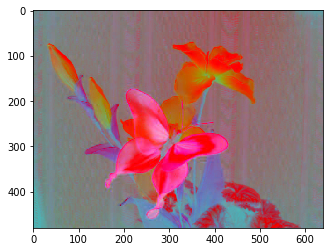

In [8]:
plt.imshow(im2)